## World Population

### import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
data = pd.read_csv('world_population.csv')
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
data.shape

(234, 17)

In [12]:
data.describe().T\
    .sort_values(ascending=0, by='mean')\
    .style.background_gradient(cmap="BuGn")\
    .bar(subset=['std'], color="red")\
    .bar(subset=['max', 'min'], color='purple')\
    .bar(subset=['mean'], color='blue')

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


In [47]:
features = data.columns
for feature in features:
    print(f'{feature} ====> {data[feature].nunique()}')

Rank ====> 234
CCA3 ====> 234
Country ====> 234
Capital ====> 234
Continent ====> 6
2022 Population ====> 234
2020 Population ====> 234
2015 Population ====> 234
2010 Population ====> 234
2000 Population ====> 234
1990 Population ====> 234
1980 Population ====> 234
1970 Population ====> 234
Area (km²) ====> 233
Density (per km²) ====> 234
Growth Rate ====> 180
World Population Percentage ====> 70


<AxesSubplot:>

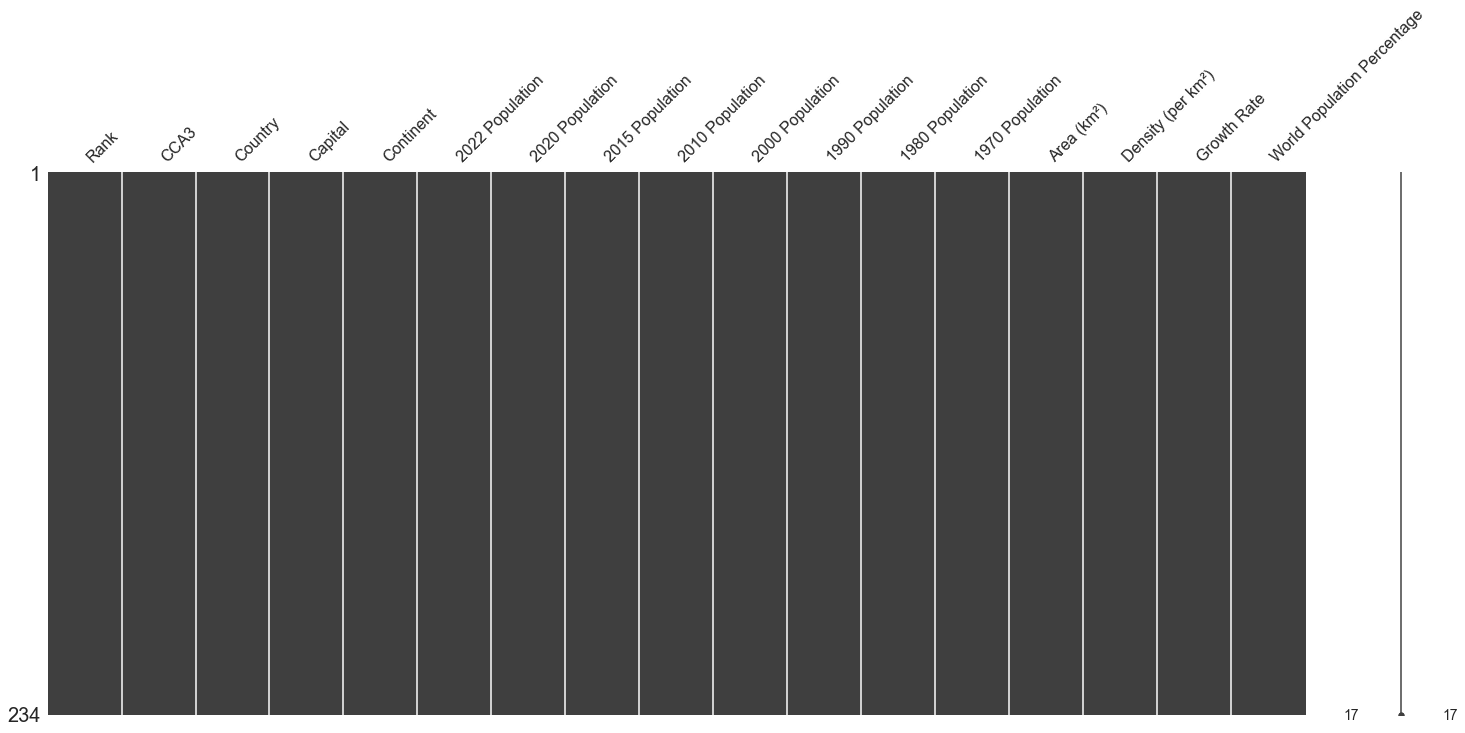

In [48]:
msno.matrix(data)

In [49]:
continent_data = data\
    .groupby('Continent')[features]\
    .mean()\
    .sort_values(by= "Density (per km²)", ascending = False)

continent_data\
    .style\
    .background_gradient(cmap = "BuGn")

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.560000,94427665.480000,93261730.700000,89165003.640000,84400826.540000,74701792.080000,64211271.540000,52706684.560000,42898125.800000,642762.820000,1025.024136,1.009384,1.183800
Europe,124.500000,14862950.760000,14915843.920000,14830712.160000,14712278.680000,14521868.460000,14406415.940000,13850543.180000,13118479.820000,460208.220000,663.324742,1.002256,0.186600
North America,160.925000,15007403.400000,14855914.825000,14259596.250000,13568016.275000,12151739.600000,10531660.625000,9207334.025000,7885865.150000,606104.450000,272.761758,1.004175,0.187750
Oceania,188.521739,1958198.000000,1910148.956522,1756664.478261,1613163.652174,1357512.086957,1162774.869565,996532.173913,846968.260870,370220.913043,132.543065,1.007383,0.023913
Africa,92.157895,25030367.228070,23871435.263158,21071972.666667,18512773.192982,14367474.245614,11195625.070175,8448006.614035,6411304.350877,531894.087719,125.047646,1.021244,0.313509
South America,97.571429,31201186.285714,30823574.500000,29509599.714286,28077017.857143,24973877.285714,21224743.928571,17270643.285714,13781939.714286,1273813.000000,20.971979,1.007957,0.391429


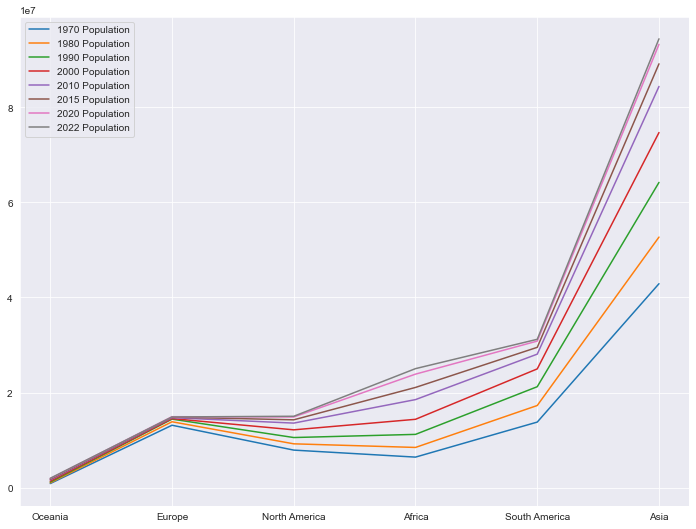

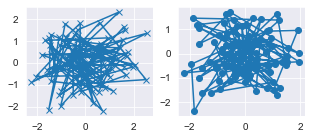

In [53]:
continent_data.sort_values(by = '2022 Population', inplace= True)
plt.figure(figsize=(12, 9))
population_feature = [
    '2022 Population',
    '2020 Population',
    '2015 Population',
    '2010 Population',
    '2000 Population',
    '1990 Population',
    '1980 Population',
    '1970 Population'
]

population_feature.reverse()
for feature in population_feature:
    plt.plot(continent_data[feature], label = feature)

plt.legend() # 범례 표시
plt.show() # 그래프 보기

## 인구수 그래프 생성
# continent_data.sort_values(by = '2022 Population', inplace = True)
# plt.figure(figsize=(20, 11))
# population_feature = [
#     '2022 Population',
#     '2020 Population',
# ]
#
# for feature in population_feature:
#     plt.plot(continent_data[feature], label = feature)

### ---
def plotter(ax, data1, data2, param):
    out = ax.plot(data1, data2, **param)
    return out

d1, d2, d3, d4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2))
plotter(ax1, d1, d2, { 'marker': 'x' })
plotter(ax2, d3, d4, { 'marker': 'o' })

In [46]:
fig = px.choropleth(
    data,
    locations='Country',
    locationmode='country names',
    color='2022 Population',
    hover_name="Country",
    color_continuous_scale='Viridis'
)

fig.show()